<a href="https://colab.research.google.com/github/piyushbuilds07/ML_1st_project/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.rcParams['figure.figsize'] = (20,10)

In [2]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [5]:
df.groupby('location')['location'].agg('count')

,location
location,
Anekal,1
Banaswadi,1
Basavangudi,1
Bhoganhalli,1
Devarabeesana Halli,6
...,...
t.c palya,1
tc.palya,4
vinayakanagar,1


In [6]:
df1=df.drop(columns=['availability','society','balcony'])
df1

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df1.isnull().sum()

,0
area_type,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [8]:
df2=df1.dropna()
df2.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [9]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

/tmp/ipython-input-1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
df2


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df2

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [13]:
def is_float(x):
  try:
    float(x);
  except:
    return False
  return True

In [46]:
df2[~(df2.total_sqft.apply(is_float))].head(10)

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [15]:
df2.drop(columns=['size'],inplace=True)

/tmp/ipython-input-3357721672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['size'],inplace=True)


In [16]:
df2

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [17]:
df3=df2[~df2.total_sqft.apply(is_float)].head(10)

In [18]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [19]:
df2['total_sqft'].apply(convert_sqft_to_num).head(10)

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
5,1170.0
6,2732.0
7,3300.0
8,1310.0
9,1020.0


In [20]:
df2

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [21]:
df3['total_sqft'].apply(convert_sqft_to_num).head(10)

,total_sqft
30,2475.0
122,5611.5
137,1073.5
165,1242.5
188,1277.5
410,NaN
549,1317.5
648,NaN
661,1132.5
672,4046.0


In [22]:
df4 = df2.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [23]:
df4

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4


In [24]:
df4.loc[30]

,30
area_type,Super built-up Area
location,Yelahanka
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [25]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [49]:
df_location_count=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
df_location_count

,location
location,
other,2896
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
...,...
Pattandur Agrahara,11
Narayanapura,11
Nehru Nagar,11


In [27]:
df_location_count_less_than_ten=df_location_count[df_location_count<=10]

In [28]:
df_location_count_less_than_ten

,location
location,
Nagadevanahalli,10
Naganathapura,10
BTM 1st Stage,10
Nagappa Reddy Layout,10
Basapura,10
...,...
bsk 6th stage 2ad block near sri conversation hall,1
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1


In [29]:
df4.location=df4.location.apply(lambda x: 'other' if x in df_location_count_less_than_ten else x)

In [30]:
len(df4.location.unique())

242

In [50]:
df4[(df4.total_sqft/df4.bhk)<300]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Plot Area,other,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [32]:
df4.shape

(13246, 6)

In [33]:
df4

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5
13316,Super built-up Area,other,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4


In [34]:
df4["price_per_sqft"]=(df4.price/df4.total_sqft)*10**5

In [35]:
df4

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [36]:
df5=df4[(df4.total_sqft/df4.bhk)>=300]

In [37]:
df5

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [38]:
def removes_outliers_pps(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    sd=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [39]:
df6=removes_outliers_pps(df5)

In [40]:
df6.shape

(10244, 7)

In [41]:
def sactterplotfun(df,location):
  bhk2=df6[(df6.location==location) & (df6.bhk==2)]
  bhk3=df6[(df6.location==location) & (df6.bhk==3)]
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title('location')
  plt.legend()


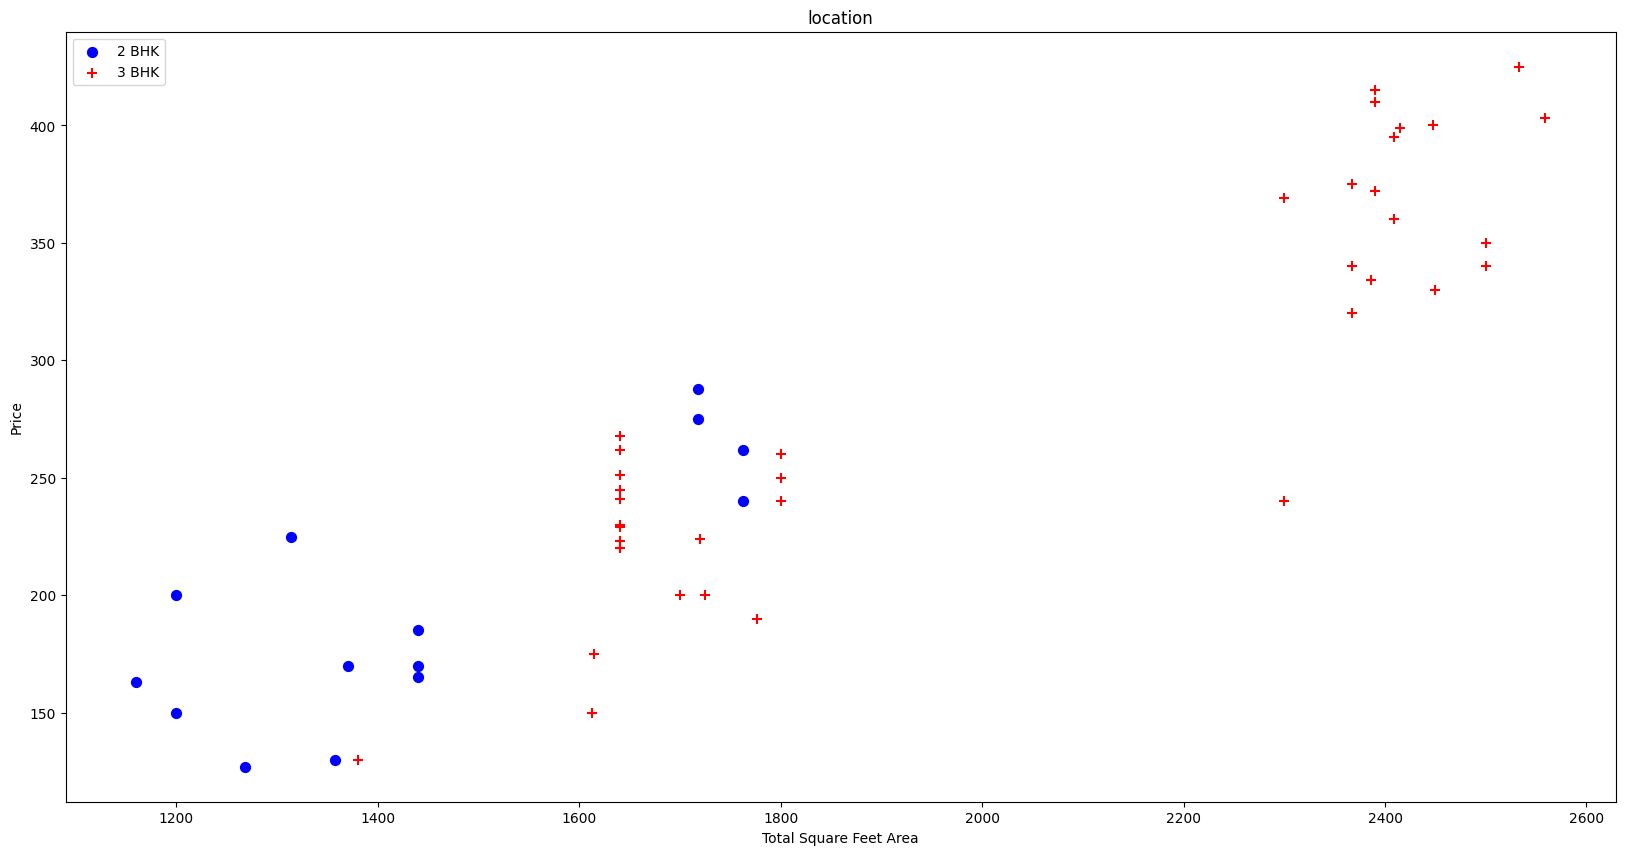

In [42]:
sactterplotfun(df6,'Rajaji Nagar')

In [51]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location , location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk , bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
      for bhk , bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape



(7342, 7)

In [53]:
def sactterplotfun(df,location):
  bhk2=df7[(df7.location==location) & (df7.bhk==2)]
  bhk3=df7[(df7.location==location) & (df7.bhk==3)]
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title('location')
  plt.legend()

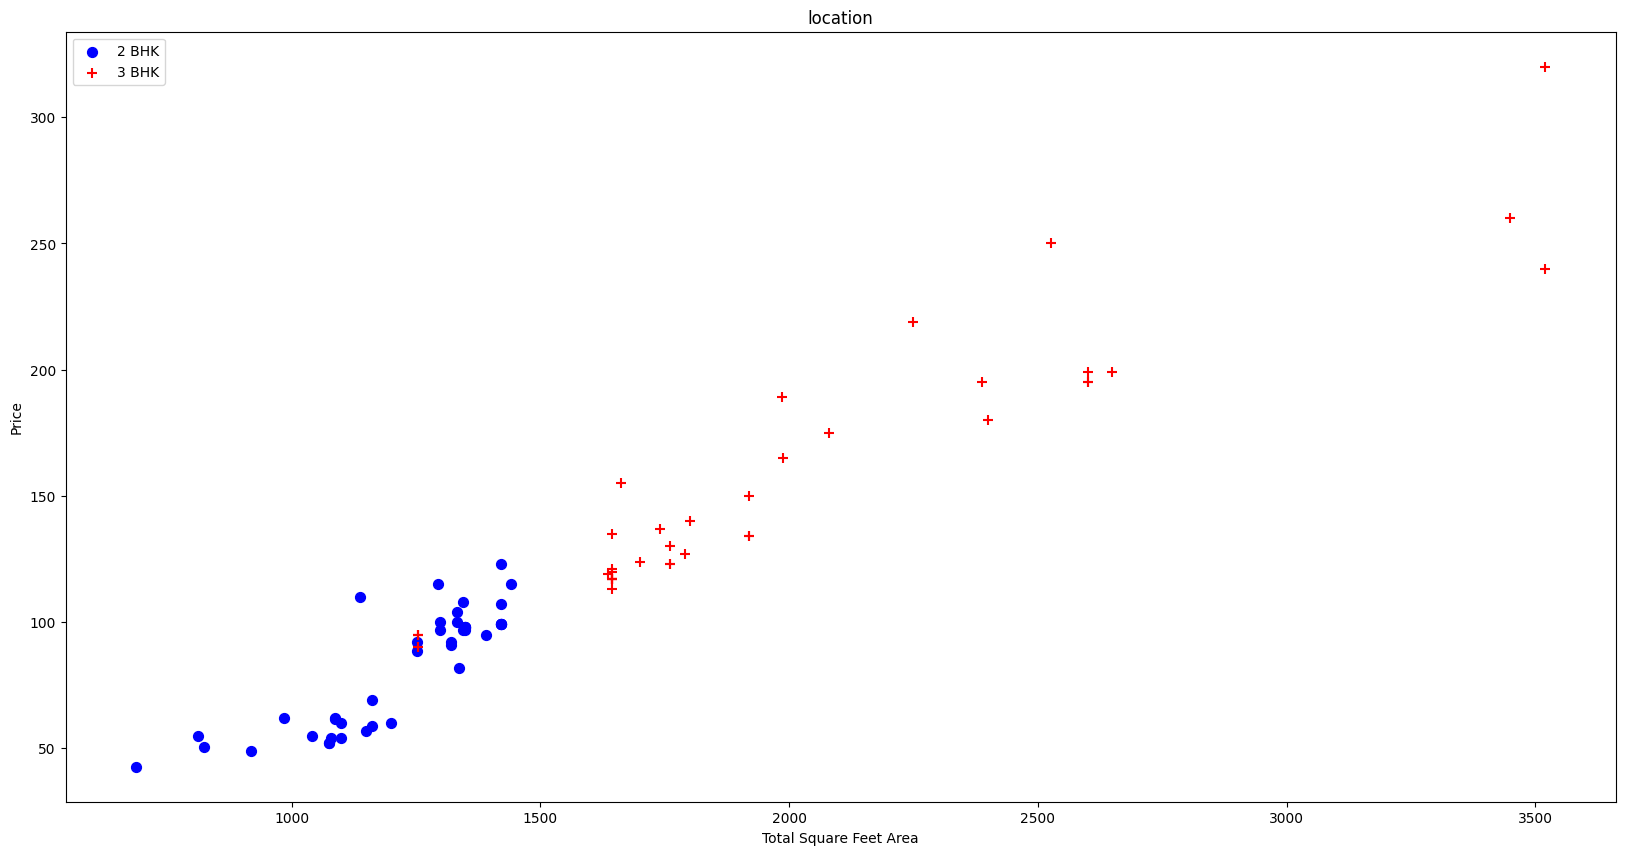

In [55]:
sactterplotfun(df7,'Hebbal')

Text(0, 0.5, 'count')

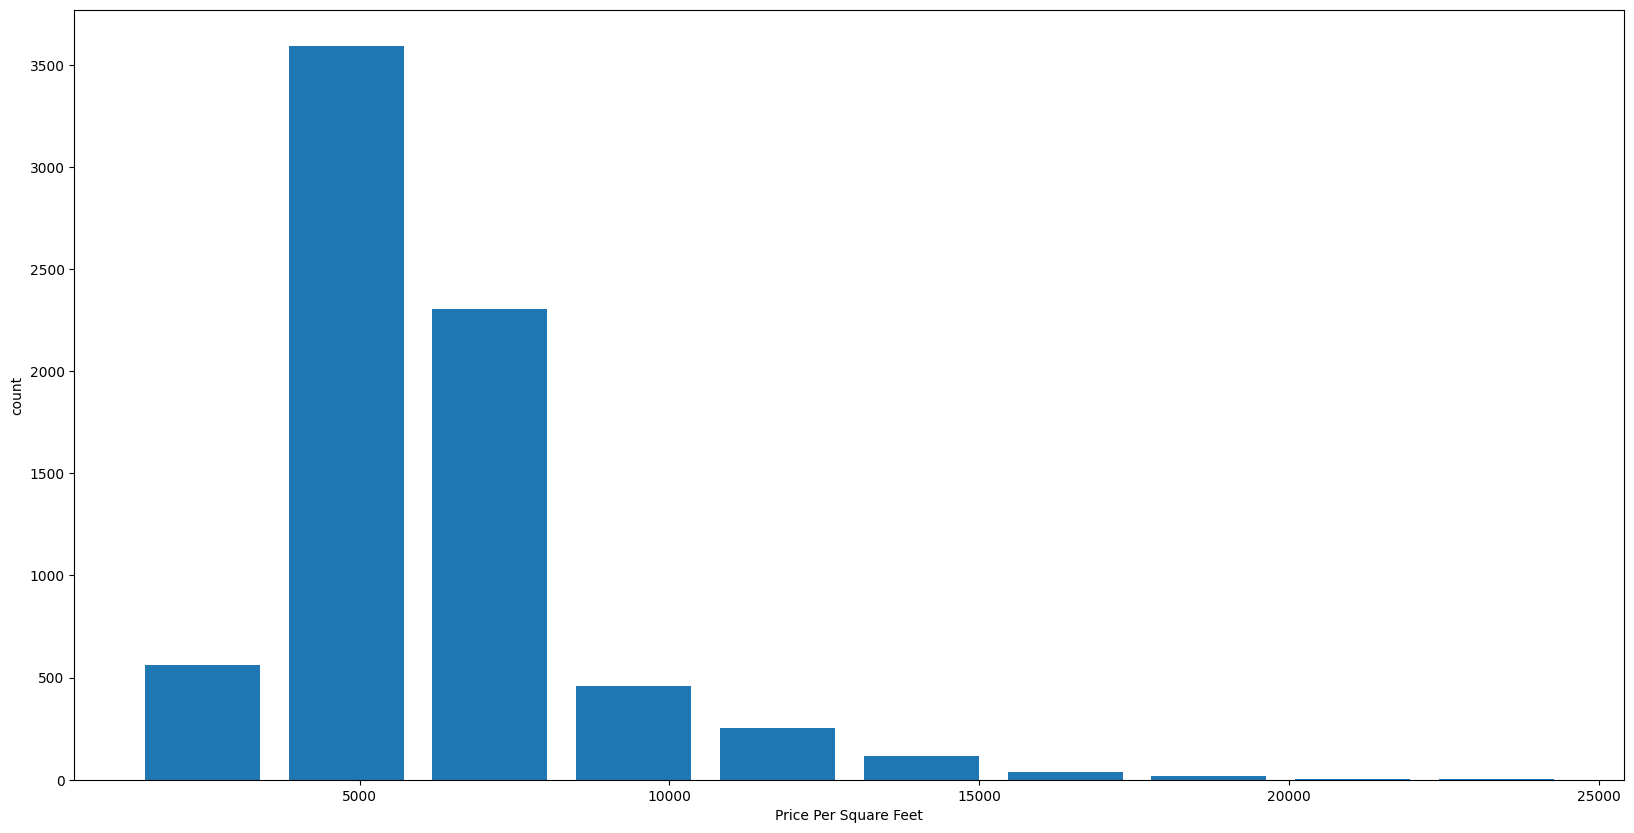

In [56]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel("count")


In [57]:
df7[df7.bath>10]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
5271,Super built-up Area,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8481,Super built-up Area,other,12000.0,12.0,525.0,10,4375.000000
8570,Super built-up Area,other,10000.0,16.0,550.0,16,5500.000000
9309,Super built-up Area,other,6000.0,12.0,150.0,11,2500.000000
9641,Super built-up Area,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

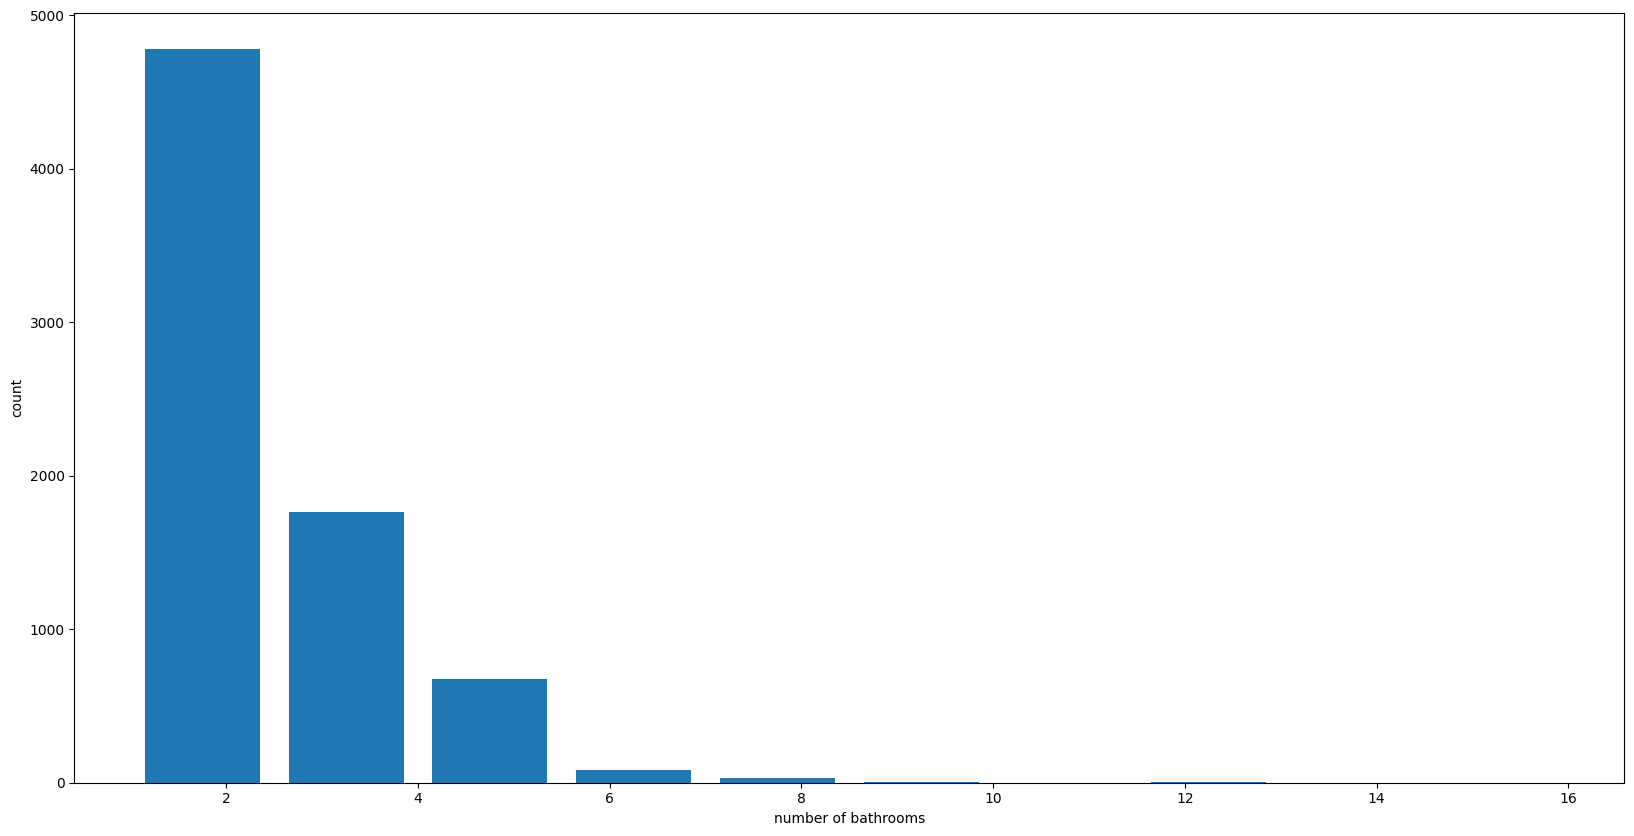

In [59]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [61]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7264, 7)

In [65]:
df9 = df8.drop(['price_per_sqft'],axis='columns')
df9.head(3)

,area_type,location,total_sqft,bath,price,bhk
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,40.0,2
